#  Intro to Time Series


### LEARNING OBJECTIVES

*After this lesson, you will be able to:*
- Explain the components of time series data
- Explain autocorrelation 
- Measure autocorrelation in Pandas
- Model and predict from time series data using AR, MA  models
- Code those models in `statsmodels`


In this tutorial, we will discuss following Key concepts:

- Trends
- Seasonality
- Autocorrelation

Following these concepts, we will explore AR and MA models for forecasting.


<a name="intro-trend-season"></a>
## Introduction: Trend and Seasonality


**TREND**
- A trend is any long-term change in the value we're measuring. Trends may “change direction”, going from an increasing trend to a decreasing trend.

- Trend can only be measured in the scope of the data collected; there may be trends that are unmeasureable if the data are not complete.

- we have seen few examples in the presentation

**SEASONALITY**

When patterns repeat over *known, fixed periods* of time within the data set, we call this **seasonality**.

A seasonal pattern exists when a series is influenced by factors relating to the cyclic nature of time - i.e. time of month, quarter, year, etc. Seasonality is of a fixed and known period, otherwise it is not truly seasonality, and must be either attributed to another factor or counted as a set of anomalous events in the data.

![](./assets/images/seasonality_decreasing_trend.png)

### The easiest way to visualize trends is by drawing trend lines.

         Date  Temperature
0  04-01-2004           53
1  11-01-2004           53
2  18-01-2004           54
3  25-01-2004           53
4  01-02-2004           52


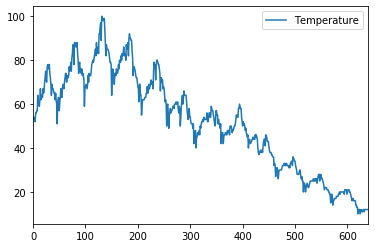

In [248]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

# Import the data
df = pd.read_csv('./assets/data/temperature_data.csv')

print(df.head())

df.plot()


In [251]:
df.columns

Index(['Date', 'Temperature'], dtype='object')

Next we need to compute a coefficient and intercept for our line. NumPy's polyfit method can do this.

Then define our polynomial function using that coefficient. We can do this on a single dimension using NumPy's poly1d method.

In [249]:
line_coef = np.polyfit(df.index,df['Temperature'],1)
print(line_coef)

polynomial = np.poly1d(line_coef)
# The intercept is ~86.59, the slops is ~0.11


[-0.10841388 86.58979622]


### Now plot our trendline over the data

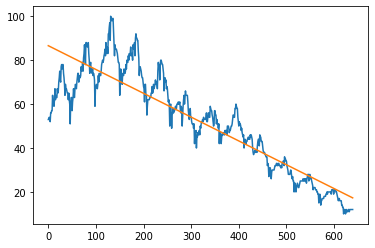

In [250]:
# Plot the time series
plt.plot(df.index, df['Temperature'])
# Plot the least squares minimizing line
plt.plot(df.index, polynomial(df.index));

<a name="demo-autocor"></a>
## Autocorrelation 

Usually our analyses has been concerned with the correlation between two or more variables (height and weight, education and salary, etc.), in time series data, autocorrelation is a measure of _how correlated a variable is with itself_.

Specifically, autocorrelation measures how closely related earlier values are with values occurring later in time.

#### How do we compute Autocorrelation?



To compute autocorrelation, we fix a lag _k_ which is the delta between the given point and the prior point used to compute the [correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient).

With a _k_ value of 1, we'd compute how correlated a value is with the prior one. With a _k_ value of 10, we'd compute how correlated a variable is with one 10 time points earlier.

$^*$ Note that this formula assumes *stationarity*, which we'll talk about shortly

### Exploration methods for time series data

Let's look for trends, seasonality and autocorrelation in data .


Because we are most interested in the `Date` column , we will make sure to process that as a `DateTime` type, and make it the index of our dataframe.


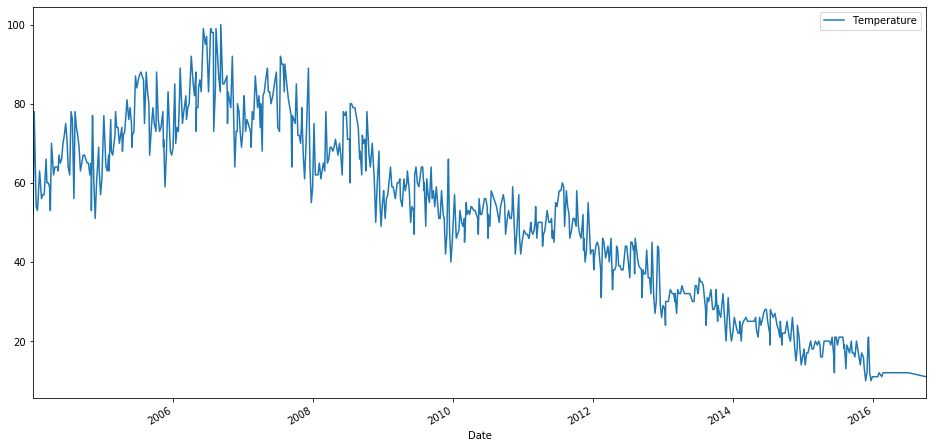

In [252]:
# import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 8.0)

data = pd.read_csv('./assets/data/temperature_data.csv', skipinitialspace=True, low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.plot()


This allows us to easily filter by date.

In [253]:
data['Year'] = data.index.year
data['Month'] = data.index.month



In [256]:
data['2015-04'].head()

,Temperature,Year,Month
Date,,,
2015-04-01,16,2015,4
2015-04-19,20,2015,4
2015-04-26,20,2015,4
2015-04-10,16,2015,4


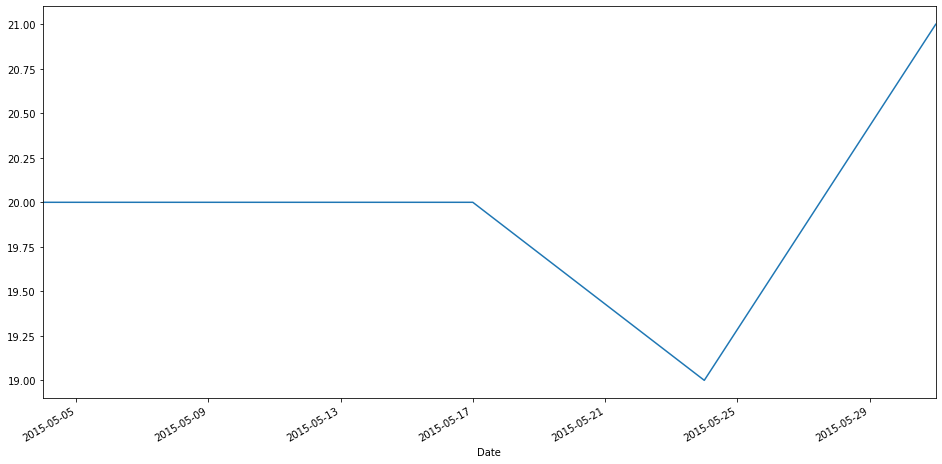

In [170]:
data['2015-05']['Temperature'].plot()

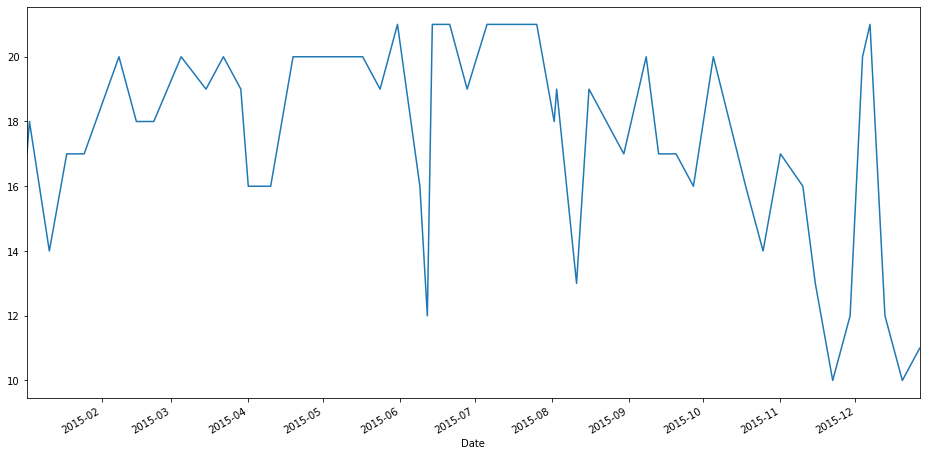

In [259]:
data_2015 = data['2015']
data_2015['Temperature'].plot();

#### Computing Autocorrelation

To measure how much the Temperatures are correlated with each other, we want to compute the _autocorrelation_ of the 'Temperature' column.

Pandas' `autocorr` function takes one argument, `lag` - how many prior data points to use to compute the correlation. If we set the `lag` to 1, we compute the correlation between every point and the point directly preceding it. Setting `lag` to 10 would computes the correlation between every point and the point 10 days earlier.



In [262]:
## Try different lag values -- what do you expect to see?

data['Temperature'].autocorr(lag=10)

0.948993513099342

### Just like with correlation between different variables, the data becomes more correlated as this number moves closer to 1.


#### Aggregates of Temperature over time

If we want to investigate trends over time in temperature, as always, we will start by computing simple aggregates. We want to know: what were the mean and median sales in each month and year?

We can use `data.resample` on the whole dataset and provide as arguments:
    - The level on which to roll-up to, 'D' for day, 'W' for week, 'M' for month, 'A' for year
    - The aggregation to perform: 'mean', 'median', 'sum', etc.



In [173]:
data[['Temperature']].resample('A', how=['median', 'mean'])


Temperature           
                median       mean
Date                             
2004-12-31        64.0  64.230769
2005-12-31        74.0  74.634615
2006-12-31        82.0  82.660377
2007-12-31        78.5  77.634615
2008-12-31        67.5  67.634615
2009-12-31        58.0  56.288462
2010-12-31        52.0  51.634615
2011-12-31        49.0  49.519231
2012-12-31        39.0  39.094340
2013-12-31        31.0  29.980769
2014-12-31        24.0  23.153846
2015-12-31        18.0  17.442308
2016-12-31        12.0  11.714286

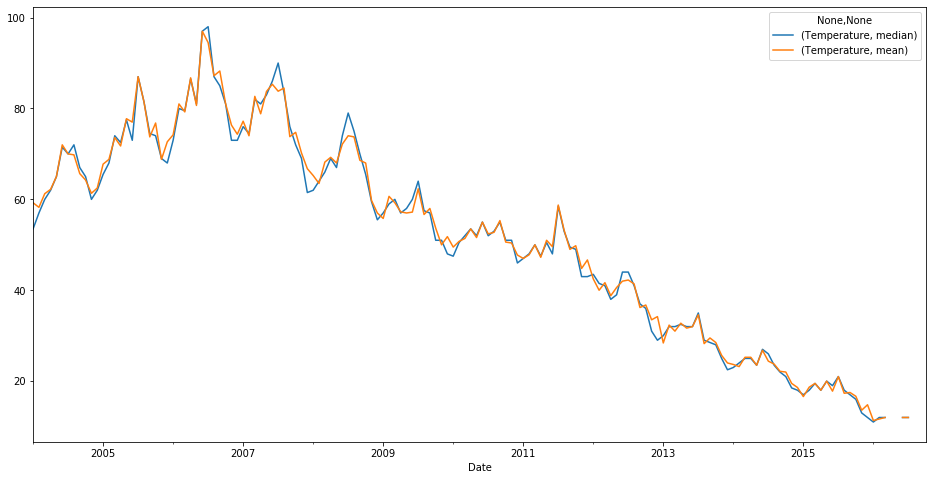

In [264]:
data[['Temperature']].resample('M', how=['median', 'mean']).plot()

In [174]:
# December 2013 and 2014 were the highest average Temperature months.
data[['Temperature']].resample('M', how=['median', 'mean'])\
.sort_values(by=('Temperature','mean'), ascending=False).head()

Temperature       
                median   mean
Date                         
2006-06-30        97.0  97.00
2006-07-31        98.0  94.50
2006-09-30        85.0  88.25
2006-08-31        87.0  87.20
2005-07-31        87.0  87.00

- We often want to compare the Temperature data of a date to a smaller window.
- E.g. to understand high temperatures days, we don't want to compare temperature data on later days of month with the entire month, but to a few days immediately surrounding it.
- We can do this using **rolling averages**.

In pandas, we can compute rolling average using the `pd.rolling().mean()` or `pd.rolling().median()` functions.



This computes a rolling mean of Temperatures using the temperatures on each day, the day preceding and the day following (window = 3, center=True).

In [175]:
# Resample to have the mean of temperature over the day 
daily_temperature = data[['Temperature']].resample('D', how='mean')
daily_temperature = daily_temperature.dropna()

moving_avg = daily_temperature.rolling(3).mean()


In [176]:
moving_avg.head()

,Temperature
Date,
2004-01-02,NaN
2004-01-08,NaN
2004-01-18,61.333333
2004-01-25,61.666667
2004-02-05,56.666667


`rolling()` takes the series to aggregate as well as few important parameters:

    - window is the number of days to include in the average
    - center is whether the window should be centered on the date or use data prior to that date

`Reference`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html




We can use our index filtering to just look at 2015.




In [178]:
# moving_avg = daily_temperature.rolling(10).mean()
daily_temperature.rolling(10,center=True).mean()['2015'].head()


,Temperature
Date,
2015-01-02,17.6
2015-01-03,17.2
2015-01-11,16.9
2015-01-18,16.9
2015-01-25,17.5


Instead of plotting the full time series, we can plot the rolling mean instead, which smooths random changes in Temperatures as well as removing outliers, helping us identify larger trends.




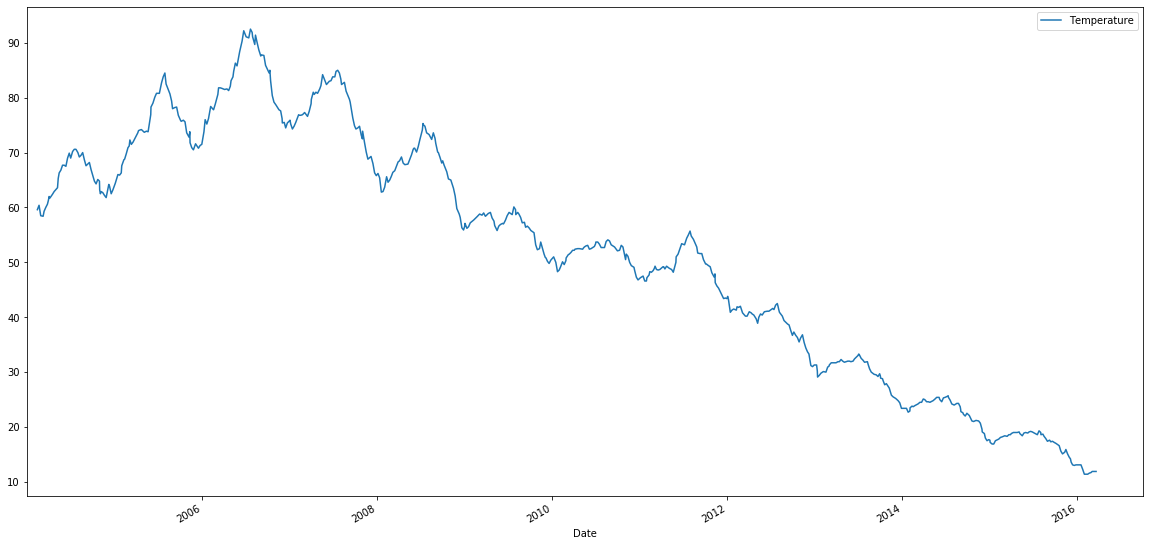

In [179]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
daily_temperature.rolling(10,center=True).mean().plot()

As we discussed earlier, this averages all values in the window evenly, but we might want to weight closer values more. For example, with a centered weighted average of 10 days, we want to put additional emphasis on +/- 1 day versus +/- 10 days. One option to do that is the `ewma` function or `exponential weighted moving average` function.

```python
daily_temperature.ewm(span=10).mean().plot()
```

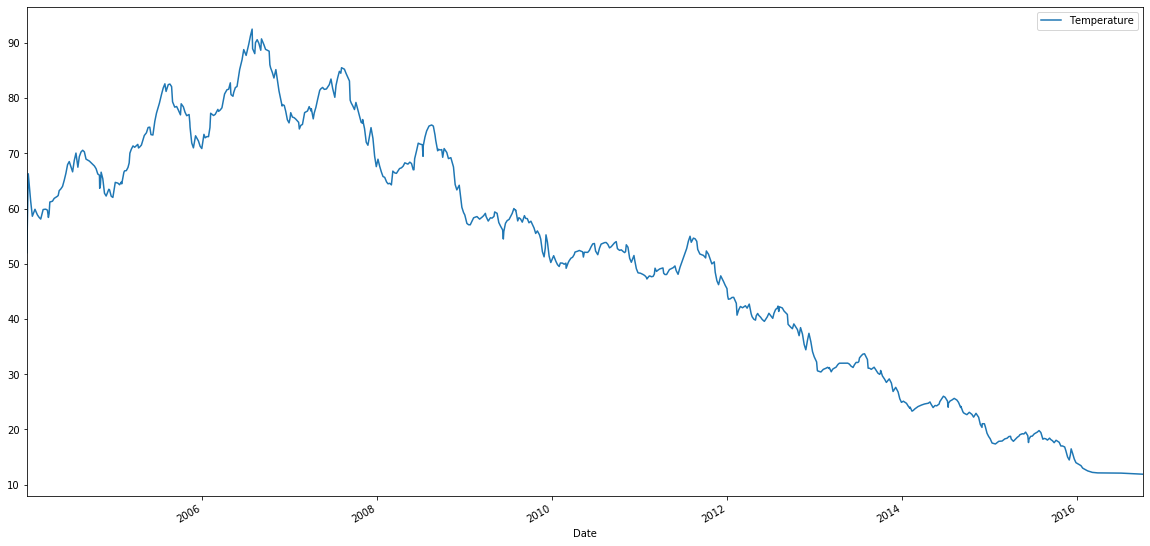

In [180]:
daily_temperature.ewm(span=10).mean().plot()

#### Pandas Window functions

Pandas `rolling().mean()` and `rolling().median()` are only two examples of Pandas window function capabilities. Window functions operate on a set of N consecutive rows (i.e.: a window) and produce an output.

In addition to `rolling().mean()` and `rolling().median()`, there are `rolling().sum()`, `rolling().min()`, `rolling().max()`... and many more.

Another common one is `diff`, which takes the difference over time. `pd.diff` takes one argument: `periods`, which measures how many rows prior to use for the difference.

For example, if we want to compute the difference in temperature, day by day:




In [184]:
daily_temperature.head()

,Temperature
Date,
2004-01-02,52.0
2004-01-08,78.0
2004-01-18,54.0
2004-01-25,53.0
2004-02-05,63.0


In [185]:
daily_temperature.diff(periods=1).head()


,Temperature
Date,
2004-01-02,NaN
2004-01-08,26.0
2004-01-18,-24.0
2004-01-25,-1.0
2004-02-05,10.0


However, if wanted to compare the same day the prior week, we could set `periods=7`


In [186]:
daily_temperature.diff(periods=7)

,Temperature
Date,
2004-01-02,NaN
2004-01-08,NaN
2004-01-18,NaN
2004-01-25,NaN
2004-02-05,NaN
2004-02-15,NaN
2004-02-22,NaN
2004-02-29,5.0
2004-03-10,-12.0


# Part 2: time series Models

<a name="conclusion"></a>
## Recap
- We use time series analysis to identify changes in values over time
- We want to identify whether changes are true trends, seasonal changes or something else
- Autocorrelations are a measure of how much a data point is dependent on previous data points
- Rolling means give us a local statistic of an average in time, smoothing out random fluctuations and removing outliers

### Time series models

- Time series models predict a future value in the time series. Like other predictive models, we will use prior history to predict the future. Unlike previous models, we will use the _outcome_ variables from earlier in time as the _inputs_ for prediction.



<a name="intro-tsmprops"></a>
## Properties of Time Series Models 

### Training and test sets

Since there is a time component to our data, we **cannot choose training and test examples at random.** As we are attempting to predict **a sequence of future values**, we must train on values from earlier (in time) in our data and then test our values at the end of the period.



### Stationarity

Many models make an assumption of **stationarity**: assuming the mean and variance of our values is the same throughout.

This means that while the values (of Temperature, for example) may shift up and down over time, the _mean value_ of Temperature is constant, as well as the variance.




As always, these assumptions may not apply to raw real-world data. (In fact, they rarely do!) 

For example, typical stock market performance is not stationary. In this plot of Dow Jones performance since 1986, the mean is clearly increasing over time.

![](./assets/images/dow-jones.png)

We can preprocess our data to achieve stationarity. Two common methods are _detrending_ and _differencing_.

_Detrending_ removes major trends in our data. The simplest way is to fit a line to the trend, then make a new series of the difference between the line and the true series. 


Below are U.S. housing prices over time demonstrating an upward trend. This makes the time-series non-stationary, as the mean home price is increasing. The line fit through it represents the trend.

The bottom figure is the "detrended" data, where each data point is transformed by subtracting off the value of the trend line at that point This data now has a fixed mean and may be easier to model. This is similar to mean-scaling our features in earlier models with `StandardScaler`.

![](./assets/images/detrend.gif)



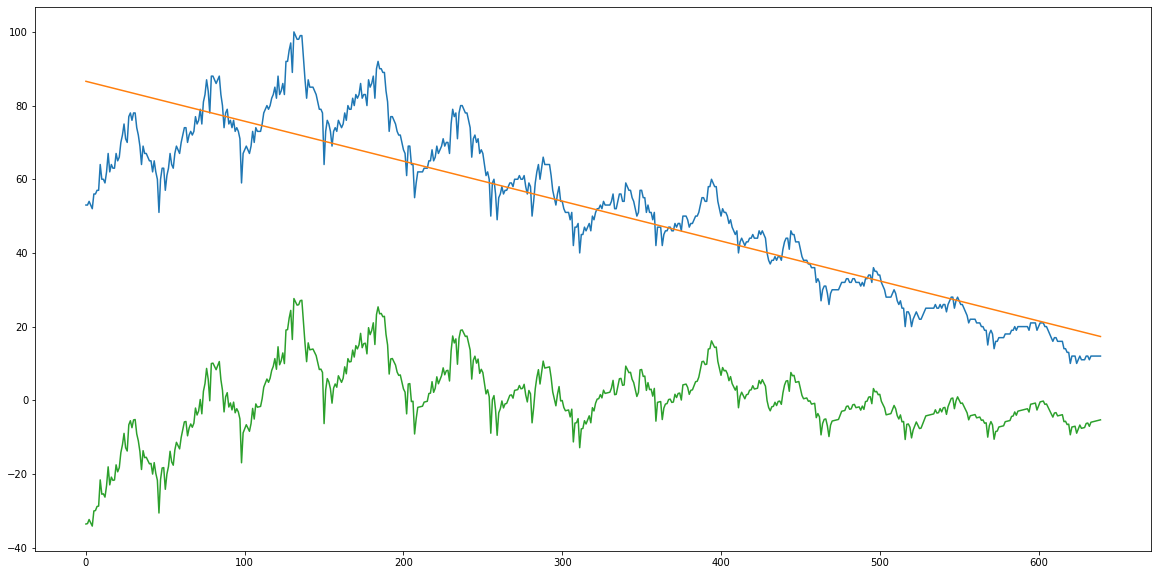

In [188]:
## Fit a trend line
import numpy as np
import matplotlib.pyplot as plt
coefs = np.polyfit(df.index,df['Temperature'],1)
lineFunction = np.poly1d(coefs)
plt.plot(df.index, df.Temperature, df.index, lineFunction(df.index))

## Detrend: in its simplest form, literally subtract the trend line
plt.plot(df.index, df.Temperature - lineFunction(df.index));

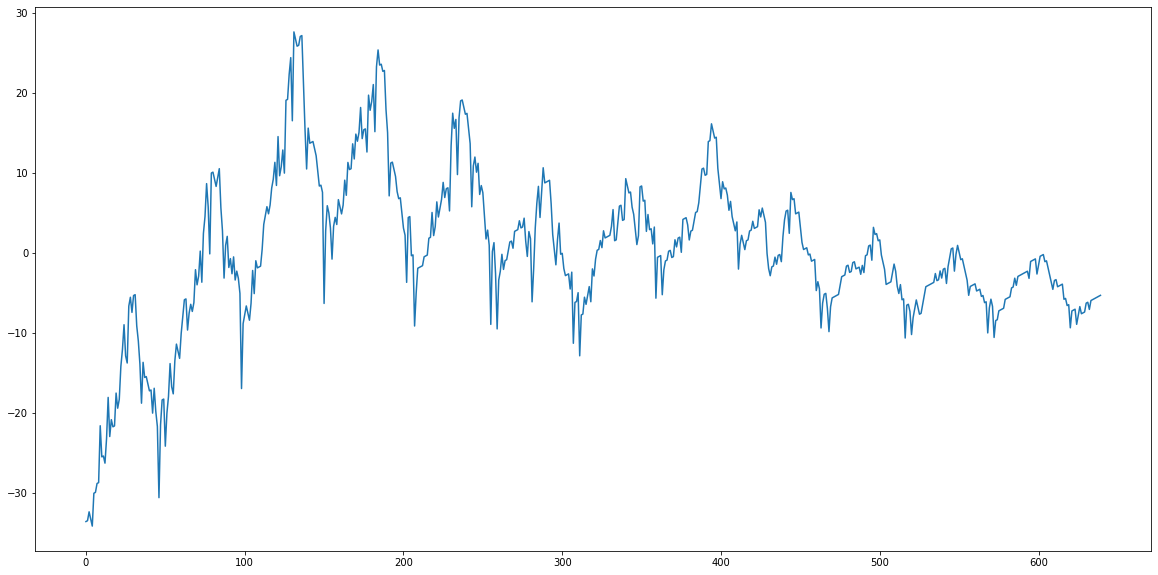

In [189]:
## There are helper functions to do this too, e.g.:
import scipy.signal
ffty = scipy.signal.detrend(df.Temperature.values)
plt.plot(df.index, ffty)


- A related method is _differencing_.

- Instead of predicting the (non-stationary) series, we can predict the difference between two consecutive values.



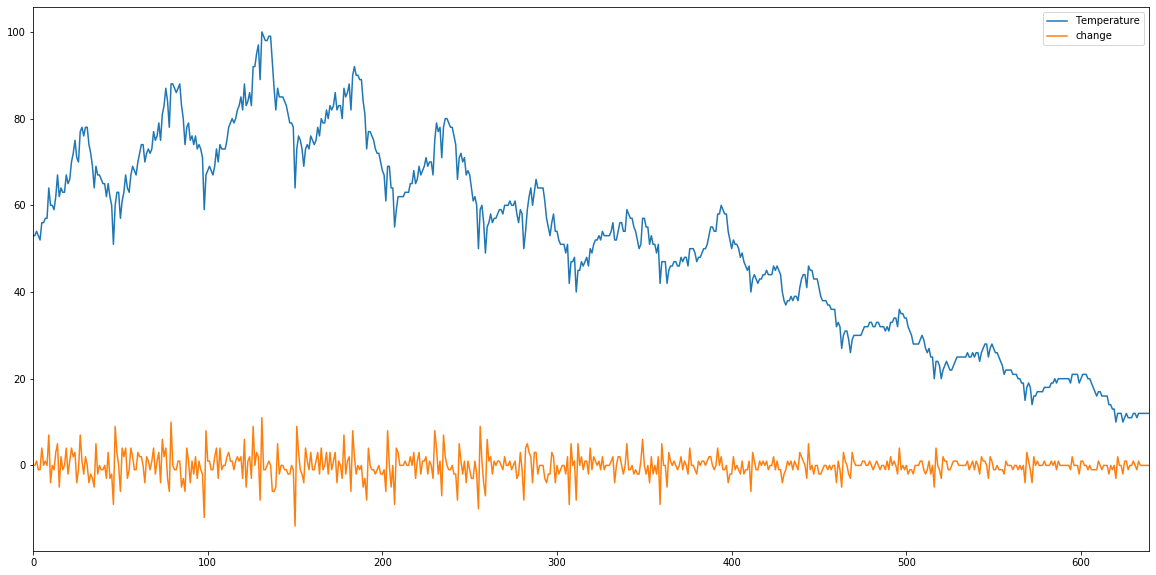

In [190]:
# the .diff() method

df['change'] = df.Temperature.diff(1);
df.plot()

### Time series modeling




<a name="intro-ar"></a>
## AR Models (5 min)

- **Autoregressive (AR) models** use data from previous time-points to predict the next time-point


- Structurally these are just like linear regression models, except as input we take some previous outcome.


- Typically, AR models are denoted AR(p), where _p_ indicates the number of previous time points to incorporate. AR(1) is the most common.





- Similar to standard regression, we'll learn regression coefficients, where the inputs or features are the previous _p_ values: so we learn _p_ coefficients.

$$y_i = c + \beta_1 * y_{i-1} + \beta_2 * y_{i-2}\ +\ ...\ +\ \beta_p * y_{i-p}\ +\ \epsilon$$

- As with standard regression, our model assumes that each outcome variable is a linear combination of the inputs and a random error term.  



- For AR(1) models, we will learn a _single_ coefficient. This coefficient will tell us the relationship between the previous value and the next one. A value > 1 would indicate a growth over previous values.


- Values above 1 and below -1 represent increasing and decreasing patterns, respectively.

- Recall, _autocorrelation_ is the correlation of a value with itself. We compute correlation with values _lagged_ behind. A model with high-correlation implies that the data is highly dependent on previous values and an autoregressive model would perform well.


- Autoregressive models are useful for learning falls or rises in our series. Typically, this model type is useful for small-scale trends, such as an increase in Temperature that will gradually increase the series.


- As with other linear models, interpretation becomes more complex as we add more factors; as we go from AR(1) to AR(2) we begin to have significant _multi-collinearity_.

> **Check:** If we observe an autocorrelation near 1 for lag 1, what do we expect the single coefficient in an AR(1) model to be: > 1, between 0 and 1 or < 1?

- If the data are non-stationary, it may be > 1 -- our data may be increasing over time


- If the data are stationary, it will be between 0 and 1 -- in fact the coefficient and lag 1 autocorrelation should be the same



<a name="intro-ma"></a>
## MA Models (5 min)

**Moving average models** take previous _error terms_ as inputs. We attempt to predict the next value based on the overall average and how incorrect our previous predictions were. This is useful for modeling a sudden occurrence - like sudden rise in Temperature.

As in autoregressive models, we have an order term, _q_, and we refer to our model as _MA(q)_.  This moving average model is dependent on the last _q_ errors.

$${\Large y_i = mean + \beta_1 * \epsilon_i + ... \beta_q * \epsilon_q}$$

But we don't have the errors terms when we start - where do they come from?

This requires a more complex fitting procedure than we have seen, where we iteratively fit a model (perhaps with random error terms), compute the errors and then refit, over and over again.

We'll include the mean of the time series and that is why we call this a moving average, as we assume the model takes the mean value of a series and randomly jumps around it.



With this model, we'll learn _q_ coefficients. In an MA(1) model, we learn one coefficient where this value indicates the impact of our previous error on our next prediction.

<a name="demo1"></a>
## Demo: Time Series EDA in `statsmodels`




In [191]:
%matplotlib inline

import pandas as pd
import matplotlib as plt
plt.rcParams['figure.figsize'] = (10, 6)

# Load the data and set the DateTime index
data = pd.read_csv('./assets/data/Temperature_data.csv', skipinitialspace=True)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [192]:
# Compute the autocorrelation of Temperature for lag 1 and 2. 
# Will we be able to use a predictive model 
# - particularly an autoregressive one?

print (data.Temperature.autocorr(lag=1)) # 0.99
print (data.Temperature.autocorr(lag=2)) # 0.98



0.9922844184341599
0.9882977131757508


- We see correlation in time, implying an AR model can be useful. 

 
- An easier way to diagnose this may be to plot many autocorrelations at once.



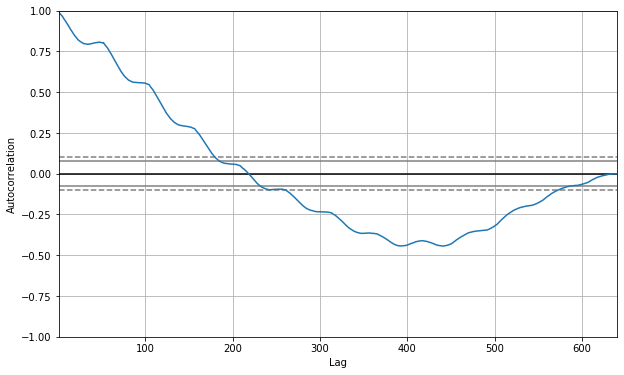

In [193]:
# What does the resulting plot show?
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data.Temperature);

# This shows a typical pattern of an autocorrelation plot - 
# it should decrease to 0 as lag increases! 
# However, it's hard to observe exactly what the values are.

<a name="demo2"></a>
## Demo: AR and MA in `statsmodels`

To explore AR and ARMA models, we will use `sm.tsa.ARMA`. We can train an autoregressive model by turning off the moving average component (setting q = 0).


In [265]:
from statsmodels.tsa.arima_model import ARMA
Temperature_data = data[['Temperature']].astype(float)


In [266]:
# train and test split
test_index_start = int(len(Temperature_data)*(0.80))
train_data = Temperature_data[:test_index_start]
test_data = Temperature_data[test_index_start:]

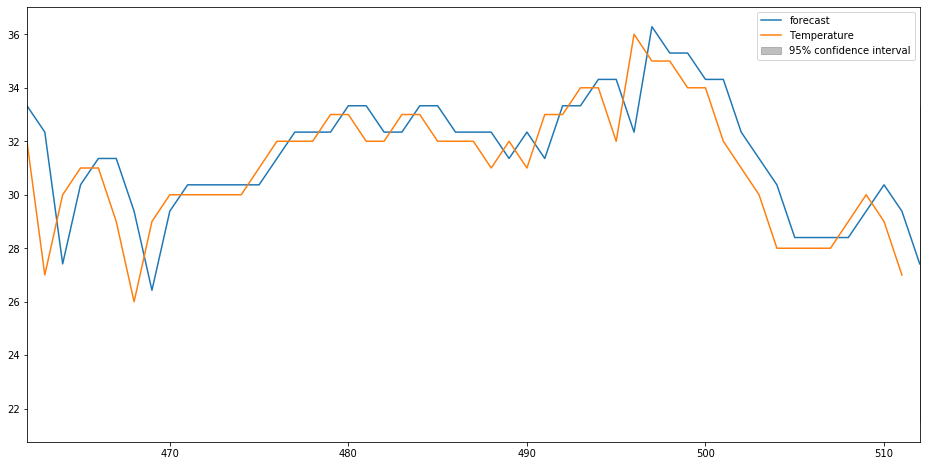

In [267]:
# training on train_data
model = ARMA(train_data, (1, 0)).fit()

# visualizing model output on train_data itself
model.plot_predict(test_index_start-50,test_index_start);

In [268]:
from sklearn.metrics import mean_squared_error

history = [x for x in train_data['Temperature']]
test = test_data['Temperature']
# make predictions
predictions = list()
for t in range(len(test)):
    model_fit = ARMA(history, (1, 0)).fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat[0])
    history.append(test[t])
    # calculate out of sample error

error = mean_squared_error(test, predictions)

In [269]:
print(error)

1.8002700091399504


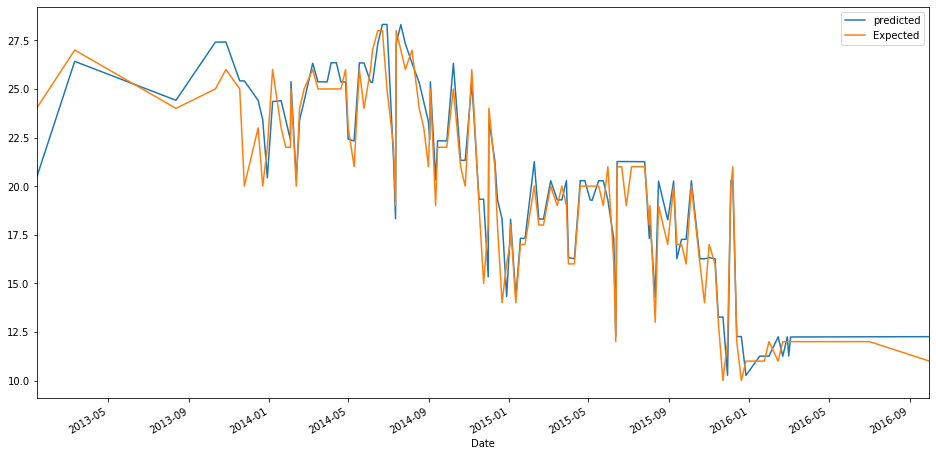

In [270]:
predicted_expected_df = pd.DataFrame({'Date': test_data.index, 'predicted' : predictions ,'Expected' : list(test_data['Temperature'])})

predicted_expected_df = predicted_expected_df.set_index('Date')

predicted_expected_df.plot()

In [271]:
# model.resid.plot()

By passing the `(1, 0)` in the second argument, we are fitting an ARMA model as ARMA(p=1, q=0). Remember, an ARMA(p, q) model is AR(p) + MA(q). This means that an ARMA(1, 0) is the same as an AR(1) model.


By passing the `(0, 1)` in the second argument, we are fitting an ARMA model as ARMA(p=0, q=1). Remember, an ARMA(p, q) model is AR(p) + MA(q). This means that an ARMA(0, 1) is the same as an MA(1) model.



In [274]:
model = ARMA(train_data, (0, 2)).fit()

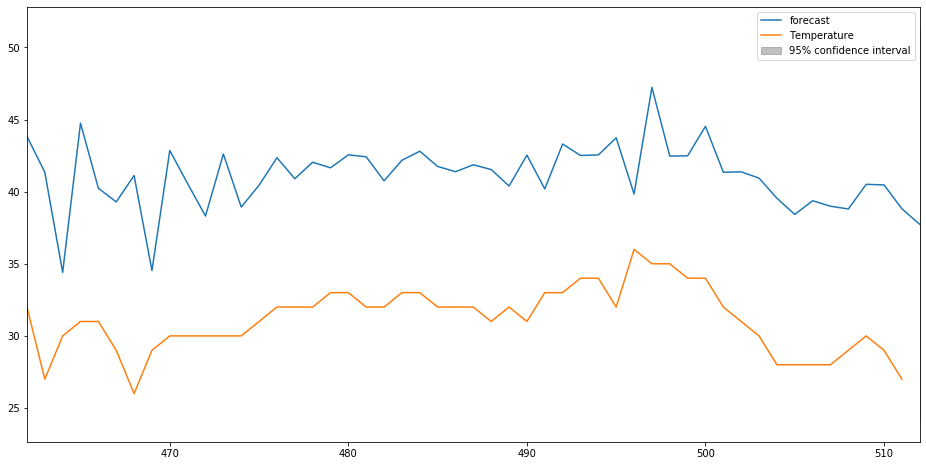

In [275]:
model.plot_predict(test_index_start-50,test_index_start);

In [276]:
history = [x for x in train_data['Temperature']]
test = test_data['Temperature']
# make predictions
predictions = list()
for t in range(len(test)):
    model_fit = ARMA(history, (0,1)).fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat[0])
    history.append(test[t])
    # calculate out of sample error

error = mean_squared_error(test, predictions)

In [277]:
error

379.6565926253487

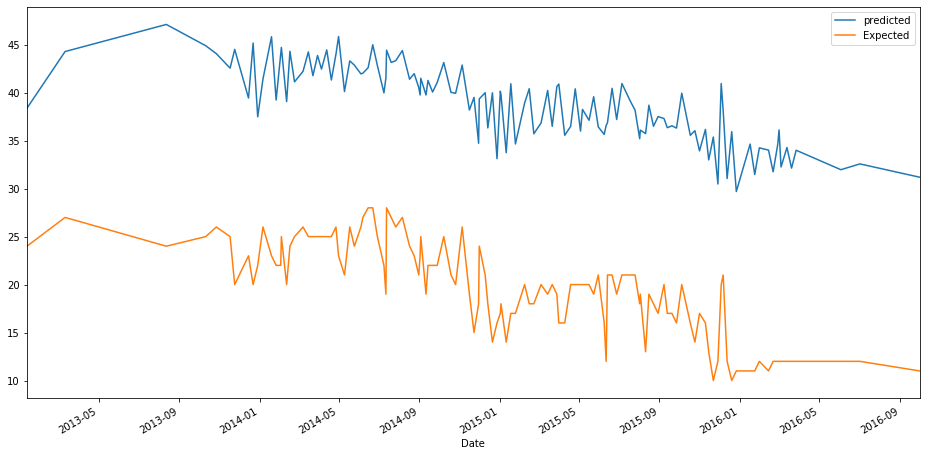

In [278]:
predicted_expected_df = pd.DataFrame({'Date': test_data.index, 'predicted' : predictions ,'Expected' : list(test_data['Temperature'])})

predicted_expected_df = predicted_expected_df.set_index('Date')

predicted_expected_df.plot()

In [232]:
# model.resid.plot()

### Linear models on time series



In [279]:
# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(Temperature_data.copy())

# Adding the lag of the target variable from 6 steps back up to 24
for i in range(1, 10):
    data["lag_{}".format(i)] = data.Temperature.shift(i)

In [280]:
data

,Temperature,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9
Date,,,,,,,,,,
2004-04-01,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-01,53.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-18,54.0,53.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-25,53.0,54.0,53.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-02,52.0,53.0,54.0,53.0,53.0,NaN,NaN,NaN,NaN,NaN
2004-08-02,56.0,52.0,53.0,54.0,53.0,53.0,NaN,NaN,NaN,NaN
2004-02-15,56.0,56.0,52.0,53.0,54.0,53.0,53.0,NaN,NaN,NaN
2004-02-22,57.0,56.0,56.0,52.0,53.0,54.0,53.0,53.0,NaN,NaN
2004-02-29,57.0,57.0,56.0,56.0,52.0,53.0,54.0,53.0,53.0,NaN


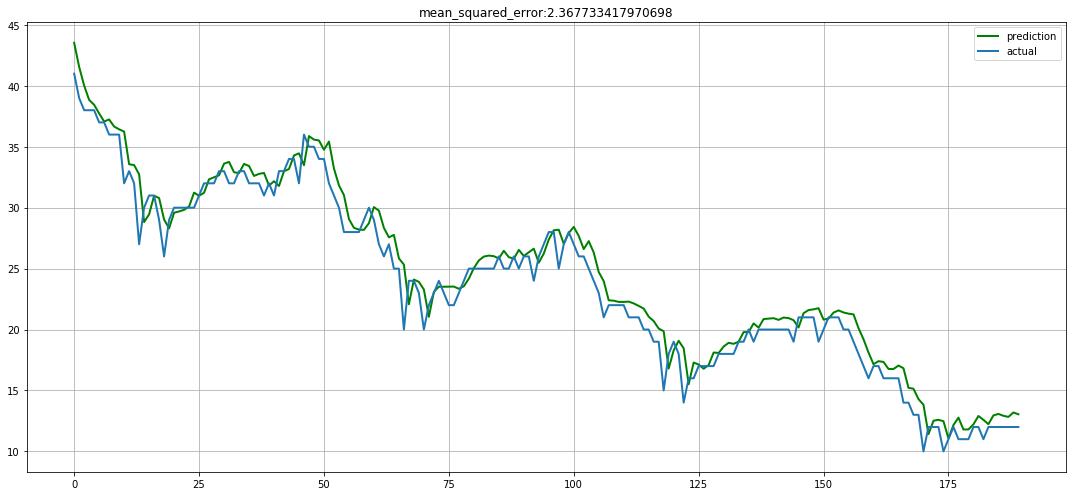

In [281]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

def plotModelResults(model, X_train, X_test, plot_intervals=False, plot_anomalies=False, scale=1.96):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.pyplot.figure(figsize=(15, 7))
    plt.pyplot.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.pyplot.plot(y_test.values, label="actual", linewidth=2.0)
    
    error = mean_squared_error(prediction, y_test)
    
    plt.pyplot.title("mean_squared_error:" + str(error))
    plt.pyplot.legend(loc="best")
    plt.pyplot.tight_layout()
    plt.pyplot.grid(True);

y = data.dropna().Temperature
X = data.dropna().drop(['Temperature'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

plotModelResults(lr,X_train, X_test, plot_intervals=False)
# plotCoefficients(lr)


<a name="demo3"></a>
## Self Exploration: ARMA and ARIMA models in `statsmodels`



<a name="intro-arma"></a>
## ARMA Models 

Another stepping stone to **ARIMA** models are **ARMA** models.

_ARMA_ models combine the autoregressive models and moving averages. We specify two model settings `p` and `q`, which correspond to combining an AR(p) model with an MA(q) model.

An ARMA(p, q) model is simply a combination (sum) of an AR(p) and MA(q) model.

Autoregressive models slowly incorporate changes in preferences, tastes, and patterns. Moving average models base their prediction not on the prior value but the prior error, allowing us to correct sudden changes based on random events - supply, popularity spikes, etc.


<a name="intro-arima"></a>
## ARIMA Models

**ARIMA** is an Autoregressive Integrated Moving Average model.

In this model, we learn an ARMA(p, q) to predict not the value of the series, but the difference of the two series.

Recall the pandas `diff` function. This computes the difference between two consecutive values. In an ARIMA model, we attempt to predict this difference instead of the actual values.

$$\Huge{y_t - y_{(t-1)} = ARMA(p, q)}$$

This handles the stationarity assumption. Instead of detrending or differencing explicitly, the model does this by adding the Integration term.

An ARIMA model has three parameters and is specified ARIMA(p, d, q), where:

- _p_ is the order of the autoregressive component
- _q_ is the order of the moving average component
- _d_ is the degree of differencing. 

$$\Large{y_t - y_{(t-1)} = ARMA(p, q)}$$

In the above, we set _d = 1_ . For a higher value of _d_, for example, d=2, the model would be:

                         diff(diff(y)) = ARMA(p, q)

We would apply the `diff` function _d_ times.




Unlike ARMA models, ARIMA does not rely on the underlying series being stationary.

The differencing operation can _convert_ the series to one that is stationary. Instead of attempting to predict the values over time, our predicted series is the _difference_ in values over time.

Since ARIMA models automatically include differencing, we can (try to) use this on a broader set of data without assumptions of a constant mean.

- ARMA: Model using a combination of Autoregressive and Moving Average terms
- ARIMA: ARMA model with an added term describing differencing order

In [236]:
# lets now look at ARMA model output
model = ARMA(train_data, (1, 1)).fit()


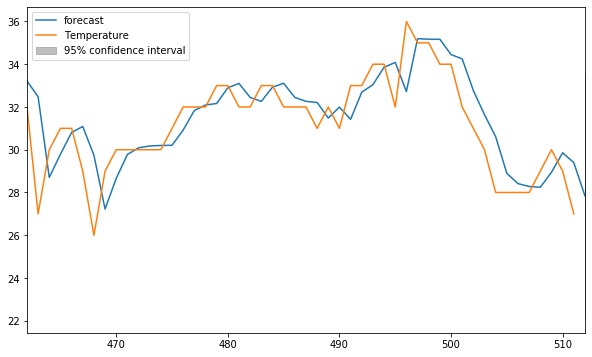

In [238]:
model.plot_predict(test_index_start-50,test_index_start);

In [239]:
history = [x for x in train_data['Temperature']]
test = test_data['Temperature']
# make predictions
predictions = list()
for t in range(len(test)):
    model_fit = ARMA(history, (1,1)).fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat[0])
    history.append(test[t])
    # calculate out of sample error

error = mean_squared_error(test, predictions)

In [240]:
error

1.6073234434489656

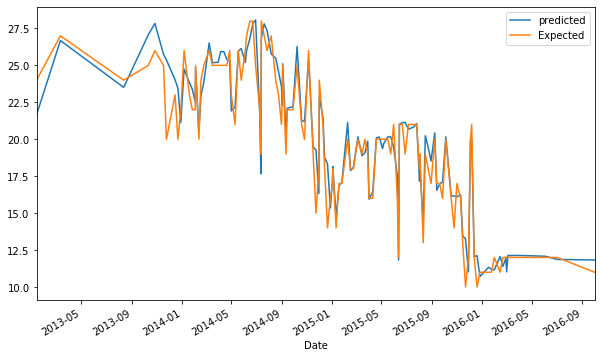

In [241]:
predicted_expected_df = pd.DataFrame({'Date': test_data.index, 'predicted' : predictions ,'Expected' : list(test_data['Temperature'])})

predicted_expected_df = predicted_expected_df.set_index('Date')

predicted_expected_df.plot()

Now we learn two coefficients, one for the AR(1) component and one for the MA(1)


Remember this is an AR(1) + MA(1) model. So the AR coefficient represents dependency on the last value and the MA component represents any spikes independent of the last value.

**ARIMA:**
To train an ARIMA model in `statsmodels`, we can change the `ARMA` model to `ARIMA` and provide the differencing parameter. To start, we can see that we can train an ARMA(1,1) model by training an ARIMA(1, 0, 1) model.

In [242]:
from statsmodels.tsa.arima_model import ARIMA


In [243]:
model = ARIMA(train_data, (1, 1, 1)).fit()

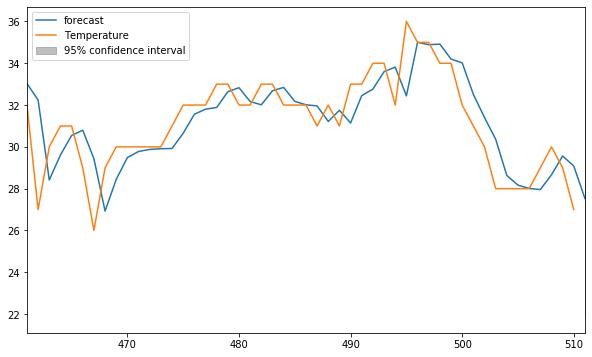

In [245]:
model.plot_predict(test_index_start-50,test_index_start);

In [246]:
history = [x for x in train_data['Temperature']]
test = test_data['Temperature']
# make predictions
predictions = list()
for t in range(len(test)):
    model_fit = ARIMA(history, (1, 1, 1)).fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat[0])
    history.append(test[t])
    # calculate out of sample error

error = mean_squared_error(test, predictions)

In [247]:
error

1.4927964441050658

<a name="conclusion"></a>
## Recap 
- Timeseries models use previous values to predict future values, also known as forecasting.
- AR and MA model are simple models on previous values or previous errors respectively.
- ARMA combines these two types of models to account for both local shifts (due to AR models) and abrupt changes (MA models)
- ARIMA models train ARMA models on differenced data to account for non-stationarity


***




### Further reading
- [Introduction To ARIMA (Duke)](http://people.duke.edu/~rnau/411arim.htm)
- [Forecasting: Principles and Practice - ARIMA Model](https://www.otexts.org/fpp/8/1) -- **highly recommended**
- ['Everything is seasonal'](https://www.youtube.com/watch?v=IiF4-g001EQ)
- [ARIMA model overview](https://www.quantstart.com/articles/Autoregressive-Integrated-Moving-Average-ARIMA-p-d-q-Models-for-Time-Series-Analysis)
- [Time Series Analysis in Python with statsmodels](http://conference.scipy.org/proceedings/scipy2011/pdfs/statsmodels.pdf)
- [Investopedia: Stationarity](http://www.investopedia.com/articles/trading/07/stationary.asp)
- [Google Search Terms predict market movements](https://www.quantopian.com/posts/google-search-terms-predict-market-movements)
- [Time Series Analysis in Python](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3)  -- **Recommended**